In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#Prepare dataframes for the training.
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Upload Dataframes:
qr_mc= quantileRegression("mc")
print "Load the mc dataframe"
startEvtmc = 0
stopEvtmc   = 2000000
print "Load the mc dataframe"
qr_mc.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)
#-------------------------------------------------------------
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = 2000000
print "Load the data dataframe"
qr_data.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016H[0],rn.run2016H[1])
dfdata = qr_data.getDF()
dfmc = qr_mc.getDF()

qr_dataH = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = 2000000
print "Load the data dataframe"
qr_dataH.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016H[0],rn.run2016H[1])
dfdataH = qr_dataH.getDF()

Load the mc dataframe
Load the mc dataframe
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EELowR9
number of events: 7073020
# lead eleMatch    =  6081954
# sublead eleMatch =  5528292
MC Sublead
lead size:  6081954
MC Lead
sublead size:  5528292
Count final dataset
11610246
Apply basic selection
 ptmin  =  25.0 
 ptmax  =  150.0  
 etamin =  -2.5  
 etamax =  2.5  
 phimin =  -3.14  
 phimax =  3.14
Reshuffle events rndm seed  =  12345
Selecting events   [ 0 ,  2000000 ]  out of  11554791
DataFrame size =  2000000
Load the data dataframe
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9
  adding  cicNoS

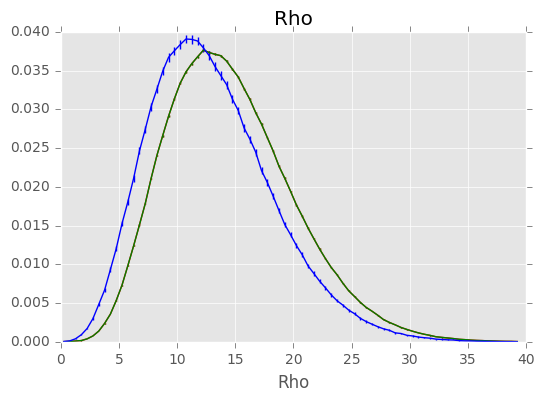

In [5]:
rv=np.arange(0,40,0.5)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho")
#plot histograms
plot.plotHistErr(dfdataH.loc[:,"rho"], rv,Color="r")
plot.plotHistErr(dfdata.loc[:,"rho"], rv,Color="g")
plot.plotHistErr(dfmc.loc[:,"rho"], rv,Color="b",Weight=dfmc["weight"])
ax.set_title("Rho")

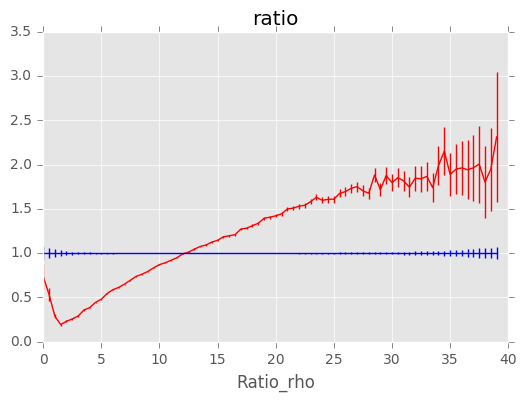

In [6]:
#so the pileup is different for every run, let's do the ratio first:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Ratio_rho")

#Do the Ratio wrt the last 
plot.plotHistRatio(dfdataH.loc[:,"rho"],dfmc.loc[:,"rho"],rv, Color="r",Weight2=dfmc["weight"])
plot.plotHistRatio(dfdataH.loc[:,"rho"],dfdata.loc[:,"rho"],rv, Color="b")
ratiodata,edge,ratiodataErr= plot.getHistRatio(dfdataH.loc[:,"rho"], dfdata.loc[:,"rho"],rv)
ratiomc,edge,ratiomcErr= plot.getHistRatio(dfdataH.loc[:,"rho"], dfmc.loc[:,"rho"],rv, Weight2=dfmc["weight"])

#ax.set_ylim([0,5])

ax.set_title('ratio')

In [7]:
import pandas as pd
#find corrected value of correction:
dfmc['bin'] = np.digitize(dfmc['rho'],edge)
dfdata['bin'] = np.digitize(dfdata['rho'],edge)
dfdata['weight'] = ratiodata[dfdata['bin'].values-1]
dfmc["corr"]= ratiomc[dfmc['bin'].values-1]
dfmc["weight"]=dfmc["weight"]*dfmc["corr"]

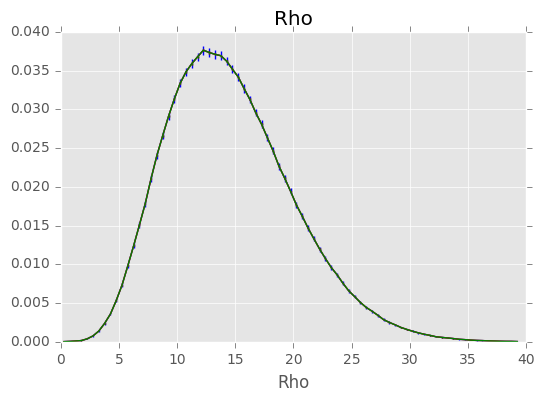

In [8]:
#Check if now Rho Match
rv=np.arange(0,40,0.5)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho")
plot.plotHistErr(dfmc.loc[:,"rho"], rv,Color="b", Weight=dfmc["weight"])
plot.plotHistErr(dfdataH.loc[:,"rho"], rv,Color="r")
plot.plotHistErr(dfdata.loc[:,"rho"], rv,Color="g",Weight=dfdata["weight"])
ax.set_title("Rho")

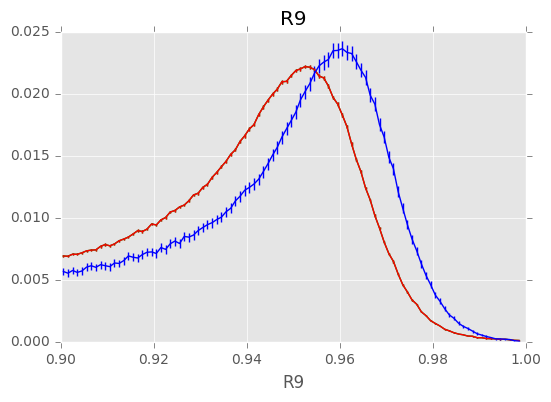

In [9]:
#Check That R9 is still different
rv2 = np.arange(0.9,1.0,0.001)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
plot.plotHistErr(dfdataH.loc[:,"R9"], rv2,Color="g")
plot.plotHistErr(dfdata.loc[:,"R9"], rv2,Color="r",Weight=dfdata["weight"])
plot.plotHistErr(dfmc.loc[:,"R9"], rv2,Color="b",Weight=dfmc["weight"])
ax.set_title('R9')

In [10]:
#set run_period on data given 
dfdata["runperiod"]=np.ones(len(dfdata.index))*5

In [11]:
#save the new montecarlo and the data in a h5 file:
dfname =  'df_mc_H.h5'
hdf = pd.HDFStore(dfname)
hdf.put('df', dfmc)
hdf.close()

dfname =  'df_data_H.h5'
hdf = pd.HDFStore(dfname)
hdf.put('df', dfdata)
hdf.close()
